# Exercise 1


In [ ]:
!pip install openpyxl
import openpyxl

# Step 1: Create a new workbook
workbook = openpyxl.Workbook()

# Step 2: Access the active sheet
sheet = workbook.active

# Step 3: Add values to specific cells (just like shown in the image)

sheet['A1'] = "First number ==> "  # Add the label in A1
sheet['B1'] = 2  # Add the first number value in B1

sheet['A2'] = "Second number ==> "  # Add the label in A2
sheet['B2'] = 8  # Add the second number value in B2

# Step 4: Add a formula to B3 to multiply B1 and B2
sheet['B3'] = "=B1*B2"  # Formula that multiplies B1 and B2

# Step 5: Save the workbook with a specific name
workbook.save("simple_calculator.xlsx")

# Closing the workbook after saving
workbook.close()


# Exercise 2


In [ ]:
import openpyxl

# Step 1: Open the workbook
file_path = '/content/Plants.xlsx'
workbook = openpyxl.load_workbook(file_path)

# Step 2: Get a reference to the first sheet (Sheet1)
sheet = workbook['Sheet1']

# Step 3: Start reading from cell A2
row = 2  # Starting at the second row
while True:
    # Get the plant name from column A (row, 1)
    plant_name = sheet.cell(row=row, column=1).value

    # If we hit an empty cell, stop the loop
    if plant_name is None:
        break

    # Step 4: Check the stock status in column H (which is column 8)
    stock_status = sheet.cell(row=row, column=8).value

    # Step 5: If the plant is not in stock, print the plant name
    if stock_status == "No":
        print(f"Plant not in stock: {plant_name}")

    # Move to the next row
    row += 1

# Closing the workbook after reading
workbook.close()


Plant not in stock: Honeysuckle
Plant not in stock: Lupin
Plant not in stock: Skimmia
Plant not in stock: Rosa
Plant not in stock: Gladioli


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


# Exercise 3


In [7]:
import pandas as pd
import openpyxl

# Step 1: Load the Excel file into a DataFrame using pandas
file_path = '/content/data.xlsx'
df = pd.read_excel(file_path)

# Step 2: Filter the data where 'Sales' is greater than 1000
filtered_data = df[df['Sales'] > 1000]

# Step 3: Use openpyxl to write the filtered data back to the Excel file

# Load the workbook and get the active sheet
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Clear the sheet before writing new data (excluding header, which is row 1)
sheet.delete_rows(2, sheet.max_row)

# Step 4: Write the filtered data starting from row 2 without empty rows
for i, row in enumerate(filtered_data.iterrows(), start=2):  # Start at row 2
    sheet.cell(row=i, column=1, value=row[1]['Sales'])  # Write the 'Sales' value

# Save the changes
workbook.save(file_path)
workbook.close()

# Confirm the data has been written
filtered_data.head()


,Sales
0,1010
1,1020
2,1030
3,1040
4,1050


# Exercise 4


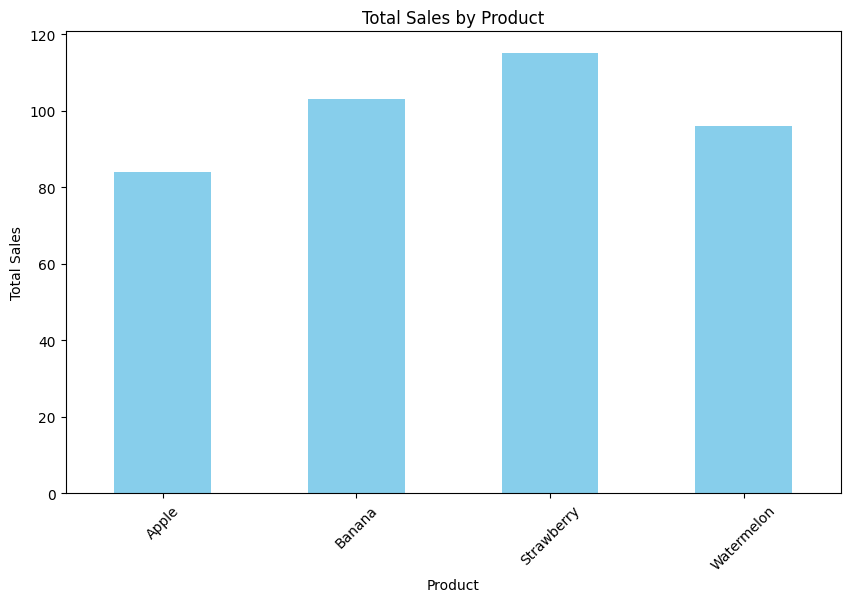

Data has been exported to 'sales_report.xlsx'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file into a DataFrame
file_path = '/content/productSales.xlsx'
df = pd.read_excel(file_path)

# Step 2: Group the data by 'product' and sum the 'sales'
grouped_data = df.groupby('product')['sales'].sum()

# Step 3: Plot the grouped data using a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Step 4: Export the grouped data to a new Excel file
output_path = '/content/sales_report.xlsx'

# Using ExcelWriter to export data
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    grouped_data.to_excel(writer, sheet_name='Sales Summary')
    #  File Saved automaticaly once exited the loop

# The grouped data has been saved to the file
print("Data has been exported to 'sales_report.xlsx'")
